# POSTTEST 6
Dimas sasongko_2009106093

## Visualiasi data Yu-Gi-Oh! Trading Cards Dataset!

## Import Package -------------------------------------------------------------------------

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Data Cleaning#
from sklearn.impute import SimpleImputer

#K-Means#
import sklearn.datasets as dts
from sklearn.cluster import KMeans

#from scipy.cluster.hierarchy import dendrogram, linkage, complete

In [44]:
df = pd.read_csv("card_data.csv")
df

,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,Trap Card,NaN,Continuous,NaN,NaN,NaN
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200.0,900.0
2,Gem-Enhancement,Trap Card,NaN,Normal,NaN,NaN,NaN
3,Magician's Circle,Trap Card,NaN,Normal,NaN,NaN,NaN
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920.0,1930.0
...,...,...,...,...,...,...,...
6529,Wattcancel,Trap Card,NaN,Counter,NaN,NaN,NaN
6530,Paleozoic Anomalocaris,XYZ Monster,2.0,Aqua,WATER,2400.0,0.0
6531,Dark Magician,Normal Monster,7.0,Spellcaster,DARK,2500.0,2100.0
6532,Odd-Eyes Pendulum Dragon,Pendulum Effect Monster,7.0,Dragon,DARK,2500.0,2000.0


In [45]:
#Info
#df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6534 entries, 0 to 6533
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       6534 non-null   object 
 1   Type       6534 non-null   object 
 2   Level      4275 non-null   float64
 3   Race       6534 non-null   object 
 4   Attribute  4275 non-null   object 
 5   ATK        4275 non-null   float64
 6   DEF        4275 non-null   float64
dtypes: float64(3), object(4)
memory usage: 357.5+ KB


In [46]:
df.describe()

,Level,ATK,DEF
count,4275.000000,4275.000000,4275.000000
mean,4.449591,1455.553216,1212.318129
std,2.185045,899.165365,802.966529
min,1.000000,0.000000,0.000000
25%,3.000000,800.000000,600.000000
50%,4.000000,1500.000000,1200.000000
75%,6.000000,2100.000000,1800.000000
max,12.000000,5000.000000,5000.000000


In [47]:
df.isna().sum()

Name            0
Type            0
Level        2259
Race            0
Attribute    2259
ATK          2259
DEF          2259
dtype: int64

In [48]:
print(f'panjang dataset {len(df)} Row')

panjang dataset 6534 Row


## Data Cleaning -------------------------------------------------------------------------
Data yang kita gunakan bisa jadi sangat berantakan. Ada informasi yang tak
lengkap, ada pula format yang berbeda-beda.Semua ini tentu membuat data itu sulit
diolah.

In [49]:
dataset_mn = df.copy()
dataset_md = df.copy()
dataset_ms = df.copy()

In [50]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_modus = SimpleImputer(strategy='most_frequent')

### Mean

In [51]:
dataset_mn['ATK'] = imputer_mean.fit_transform(dataset_mn[['ATK']])
dataset_mn.isna().sum()

Name            0
Type            0
Level        2259
Race            0
Attribute    2259
ATK             0
DEF          2259
dtype: int64

In [52]:
dataset_mn.dropna(inplace=True)
dataset_mn.isna().sum()

Name         0
Type         0
Level        0
Race         0
Attribute    0
ATK          0
DEF          0
dtype: int64

### Median

In [53]:
dataset_md['DEF'] = imputer_median.fit_transform(dataset_md[['DEF']])
dataset_md.isna().sum()

Name            0
Type            0
Level        2259
Race            0
Attribute    2259
ATK          2259
DEF             0
dtype: int64

In [54]:
dataset_md.dropna(inplace=True)
dataset_md.isna().sum()

Name         0
Type         0
Level        0
Race         0
Attribute    0
ATK          0
DEF          0
dtype: int64

### Modus

In [55]:
dataset_md['Level'] = imputer_median.fit_transform(dataset_md[['Level']])
dataset_md.isna().sum()

Name         0
Type         0
Level        0
Race         0
Attribute    0
ATK          0
DEF          0
dtype: int64

In [56]:
dataset_md.dropna(inplace=True)
dataset_md.isna().sum()

Name         0
Type         0
Level        0
Race         0
Attribute    0
ATK          0
DEF          0
dtype: int64

In [57]:
len(dataset_mn)

4275

### Data Duplikat 

In [58]:
dataset_duplicate = df.copy()
dataset_duplicate.duplicated().sum()

85

In [59]:
dataset_duplicate.drop_duplicates(inplace=True)
dataset_duplicate.duplicated().sum()

0

# K-Means Clustering
Algoritma ini menemukan kelompok data dengan nilai squared error antara rata-rata empiris dari cluster dan point di cluster minimum. Algoritma ini termasuk dalam clustering dengan pendekatan partitional. Setiap cluster berhubungan dengan centroid (point tengah). Setiap point dimasukkan pada cluster dengan centroid terdekat. Pada algoritma ini nilai K == cluster harus ditentukan.

In [60]:
dataset_mn.head(9)

,Name,Type,Level,Race,Attribute,ATK,DEF
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200.0,900.0
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920.0,1930.0
6,Lava Golem,Effect Monster,8.0,Fiend,FIRE,3000.0,2500.0
8,Seismic Crasher,Effect Monster,3.0,Rock,EARTH,1400.0,300.0
9,Laval Lancelord,Effect Monster,6.0,Warrior,FIRE,2100.0,200.0
11,Performapal Springoose,Effect Monster,5.0,Winged Beast,WIND,1100.0,2400.0
12,Miracle Flipper,Effect Monster,2.0,Spellcaster,LIGHT,300.0,500.0
13,Key Mouse,Tuner Monster,1.0,Beast,EARTH,100.0,100.0
15,Vylon Hept,Effect Monster,4.0,Fairy,LIGHT,1800.0,800.0


In [61]:
model = KMeans(n_clusters=4)

In [62]:
point = dataset_mn[['ATK','Level']]

In [63]:
model.fit(point)

KMeans(n_clusters=4)

In [64]:
label = model.labels_
label

array([0, 0, 1, ..., 1, 1, 1])

In [65]:
X = point['ATK']
Y = point['Level']

In [66]:
centroid = model.cluster_centers_
centroid

array([[1061.95422535,    3.48415493],
       [2728.81355932,    7.30508475],
       [ 240.15151515,    2.82683983],
       [1788.87969925,    4.50150376]])

In [67]:
centroid_X = centroid[:,0]
centroid_Y = centroid[:,1]

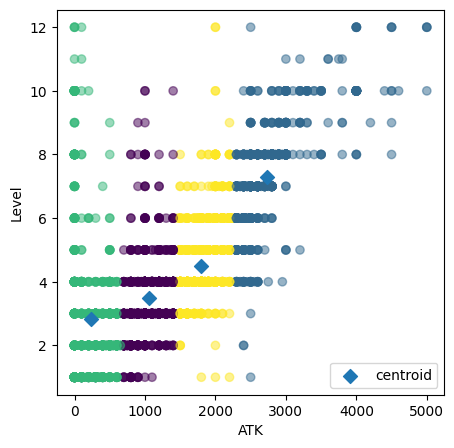

In [68]:
plt.figure(figsize=(5,5))
plt.scatter(X, Y, alpha=0.5, c=label)
plt.scatter(centroid_X, centroid_Y, marker='D', s=50, label='centroid')
plt.xlabel('ATK')
plt.ylabel('Level')
plt.legend()
plt.show()

In [69]:
cluster_range = range(1,6)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(point)
    inertias.append(model.inertia_)

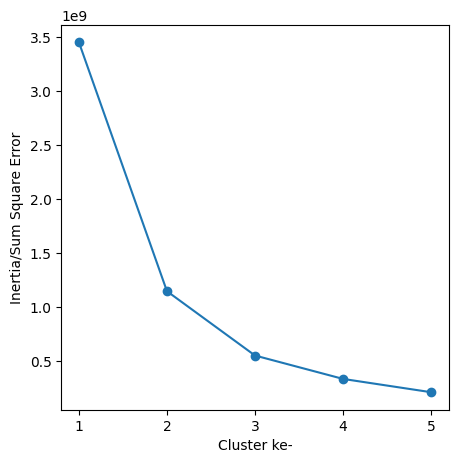

In [70]:
plt.figure(figsize=(5,5))
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('Cluster ke-')
plt.ylabel('Inertia/Sum Square Error')
plt.xticks(cluster_range)
plt.show()

# ----------------------------------------------END--------------------------------------------------------